In [76]:
# Import Dependencies
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [49]:
# Read the csv file into a pandas DataFrame
HR=pd.read_csv("../Resources/HREmployeeAttrition.csv")
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [86]:
# Select our independent X variables, and our dependent y variable. 
X = HR.drop(columns = ['Attrition'])
y = HR[['Attrition']]

In [89]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Total Counts:
Attrition
0            1233
1             237
dtype: int64

Percentage:
Attrition
0            0.838776
1            0.161224
dtype: float64


### Imbalanced

In [23]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [90]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Total Counts:
Attrition
0            1233
1             237
dtype: int64

Percentage:
Attrition
0            0.838776
1            0.161224
dtype: float64


In [91]:
# Create a Linear Regression model object
amodel = LogisticRegression(solver='liblinear')

In [92]:
# Train the model using the training datasets
amodel.fit(X_train, y_train)

C:\Users\sonya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

In [94]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

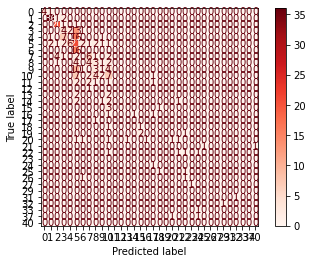

In [95]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Reds)

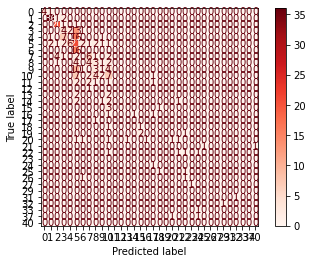

In [96]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Reds)

In [97]:
# Print classification report
print(classification_report(y_test, y_pred, target_names = ["No attrition", "Attrition"]))

ValueError: Number of classes, 34, does not match size of target_names, 2. Try specifying the labels parameter

### Balanced

In [78]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [98]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition

Attrition_test = len(y_test[y_test==1])
no_attrition_test = len (y_test[y_test==0])
tot_test = len(y_test)

print(f"Attrition = {Attrition_test}")
print(f"No Attrition = {no_attrition_test}")
print(f"Total number = {tot_test}")
print(f"Attrition rate of dataset = {round(Attrition_test/tot_test*100,3)}%")
print(f"No attrition = {round(no_attrition_test/tot_test*100,3)}%")

Attrition = 294
No Attrition = 294
Total number = 294
Attrition rate of dataset = 100.0%
No attrition = 100.0%


In [99]:
# Create the Linear Regression model object
model_s = LogisticRegression(solver = 'liblinear')

In [100]:
# Train the model using the training sets
model_s.fit(X_train, y_train)

C:\Users\sonya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

In [108]:
# Make predictions using the testing dataset
y_pred = model_s.predict(X_test)

ValueError: The number of FixedLocator locations (34), usually from a call to set_ticks, does not match the number of ticklabels (2).

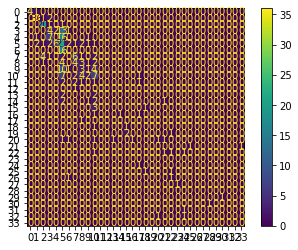

In [109]:
# Plot the Confusion Matrix values

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud","Fraud"])

disp.plot()

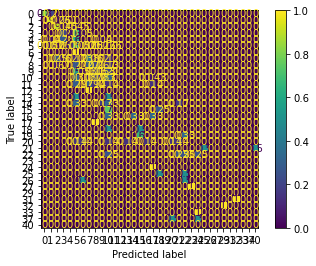

In [103]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model_strat, X_test, y_test, normalize = 'true')

In [105]:
# Print classification report
print(classification_report(y_test, y_pred, target_names = ['Attrition', 'No Attrition'] ))

ValueError: Number of classes, 34, does not match size of target_names, 2. Try specifying the labels parameter